# Instruments with different noises

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import lisainstrument
from lisaconstants import c, au


import pytdi
from pytdi.michelson import X2, Y2, Z2


## Comparing the different instruments

Start out with the simplest of all instruments, a static orbit and some not too long measurement time. Measurement time is in seconds. Disable all the noises but the pathlength noise to speed things up a bit.

In [9]:
T = 2**8
dt = 1/4
t0 = 0
t = np.arange(t0, T, dt )
print (len(t))

1024


In [10]:
size = len(t)

instrument = lisainstrument.Instrument(dt=dt,size=size, t0=t0,
                                       orbits='static')

instrument.disable_all_noises(but='pathlength')
instrument.simulate()

Plot the TM carrier fluctuations. Filter them first to avoid the HF-noise.

In [11]:
from scipy.signal import firls,lfilter, filtfilt

fir_firls= firls(241, (0,  0.5, 1, 2), (1, 1, 1e-8, 1e-12), fs=1/dt)

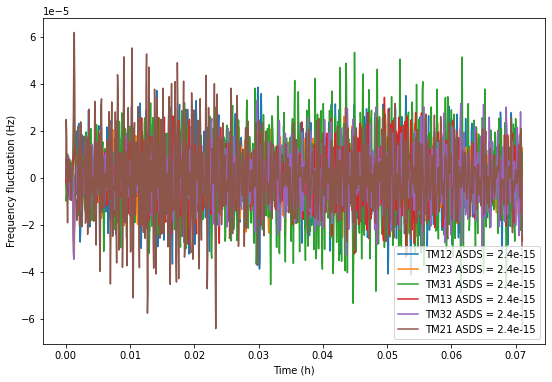

In [12]:
fig,ax = plt.subplots( figsize=(9,6) )

for k,v in instrument.tm_carrier_fluctuations.items():
    vf = filtfilt(fir_firls, [1.0], v)
    ax.plot( t/3600,vf, label = f'TM{k} ASDS = {instrument.testmass_asds[k]}' )
    
ax.set_xlabel("Time (h)")
ax.set_ylabel("Frequency fluctuation (Hz)")
ax.legend()

Create a different instrument, with larger TM noise in all the test masses. About a factor 100 larger. So that should easily show up. As the TM noise is mostly low-frequency, larger overall values should give us traces 'walking' around - essemtialy low frequency noise looks like a random drift.

In [13]:
instrument1 = lisainstrument.Instrument(dt=dt,size=size, t0=t0,
                                        testmass_asds=2.4e-13,
                                       orbits='static')

instrument1.disable_all_noises(but='pathlength')
instrument1.simulate()

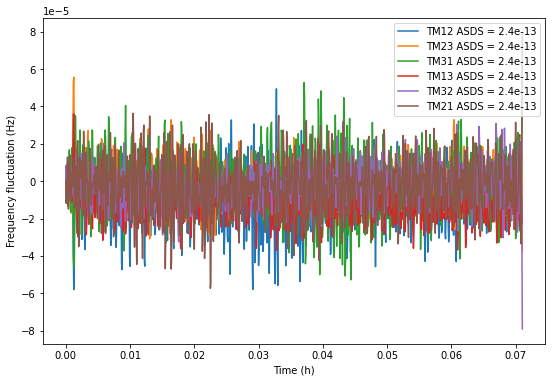

In [14]:
fig,ax = plt.subplots( figsize=(9,6) )

for k,v in instrument1.tm_carrier_fluctuations.items():
    vf = filtfilt(fir_firls, [1.0], v)
    ax.plot( t/3600,vf, label = f'TM{k} ASDS = {instrument1.testmass_asds[k]}' )
    
ax.set_xlabel("Time (h)")
ax.set_ylabel("Frequency fluctuation (Hz)")
ax.legend()

Now just change one TM and pass a dictionary to the `testmass_asds` parameter. We should see most of the traces being close to zero and the `TM 13` curve drifting away.

In [15]:
tm_asds = { k: 2.4e-15 for k in lisainstrument.Instrument.MOSAS}
tm_asds['31']= 2.4e-13

In [16]:
instrument2 = lisainstrument.Instrument(dt=dt,size=size, t0=t0,
                                        testmass_asds=tm_asds,
                                       orbits='static')

instrument2.disable_all_noises(but='pathlength')
instrument2.simulate()

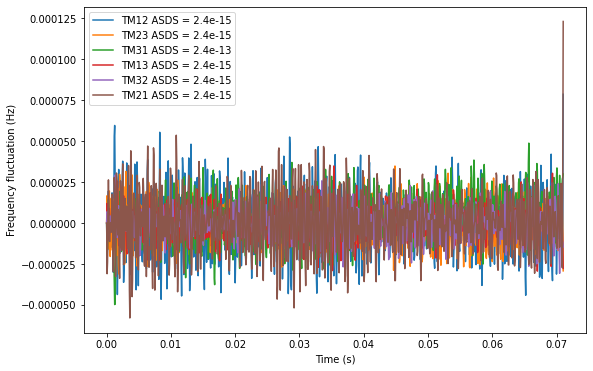

In [17]:
fig,ax = plt.subplots( figsize=(9,6) )

for k,v in instrument2.tm_carrier_fluctuations.items():
    vf = filtfilt(fir_firls, [1.0], v)
    ax.plot( t/3600,vf, label = f'TM{k} ASDS = {instrument2.testmass_asds[k]}' )
    
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency fluctuation (Hz)")
ax.legend()